<a href="https://colab.research.google.com/github/novtryrezki/Terbaru/blob/main/2CNN_bs_64_ep_20NonAug.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os
import zipfile
import random
import shutil
import numpy as np
import tensorflow as tf
import pandas as pd
from google.colab import drive
from sklearn.model_selection import train_test_split

In [ ]:
# Melakukan mount pada Google Drive
drive.mount('/content/drive')

# Menentukan path file ZIP di Google Drive
zip_path = '/content/drive/MyDrive/images.zip'

# Membuat objek zip_ref
zip_ref = zipfile.ZipFile(zip_path, 'r')

# Mengekstrak file ZIP
extract_path ='/content/images'
zip_ref.extractall(extract_path)

# Tutup objek zip_ref setelah selesai
zip_ref.close()

Mounted at /content/drive


In [ ]:
# Mendefinisikan path direktori dataset
dataset_dir = os.path.join(extract_path, 'images')
train_dir = os.path.join(dataset_dir, 'train')
test_dir = os.path.join(dataset_dir, 'test')
list_train = sorted(os.listdir(train_dir))
list_test = sorted(os.listdir(test_dir))

print("Daftar Angka pada Dataset Train yaitu : ", list_train)
print("Daftar Angka pada Dataset Test yaitu : ", list_test)

Daftar Angka pada Dataset Train yaitu :  ['angka 0', 'angka 1', 'angka 2', 'angka 3', 'angka 4', 'angka 5', 'angka 6', 'angka 7', 'angka 8', 'angka 9']
Daftar Angka pada Dataset Test yaitu :  ['angka 0', 'angka 1', 'angka 2', 'angka 3', 'angka 4', 'angka 5', 'angka 6', 'angka 7', 'angka 8', 'angka 9']


In [ ]:
def count_images(directory):
    return sum(1 for file in os.listdir(directory) if file.endswith(('.jpg', '.jpeg', '.png', '.gif')))

# Menghitung jumlah gambar di data train
train_image_count = sum(count_images(os.path.join(train_dir, angka)) for angka in list_train)

# Menghitung jumlah gambar di data test
test_image_count = sum(count_images(os.path.join(test_dir, angka)) for angka in list_test)

print(f"Jumlah gambar di Dataset Train: {train_image_count}")
print(f"Jumlah gambar di Dataset Test: {test_image_count}")

Jumlah gambar di Dataset Train: 1763
Jumlah gambar di Dataset Test: 445


# Preprocessing

In [ ]:
import cv2

def resize_images(directory, target_resolution):
    for angka in os.listdir(directory):
        angka_dir = os.path.join(directory, angka)
        for file_name in os.listdir(angka_dir):
            file_path = os.path.join(angka_dir, file_name)
            img = cv2.imread(file_path)
            resized_img = cv2.resize(img, (target_resolution[0], target_resolution[1]))
            cv2.imwrite(file_path, resized_img)

target_resolution = (52, 78)
resize_images(train_dir, target_resolution)
resize_images(test_dir, target_resolution)

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Membuat generator data dengan augmentasi
image_size = (52, 78)
batch_size = 64

train_datagen = ImageDataGenerator(
    rescale = 1./255,
)

test_datagen = ImageDataGenerator(
    rescale=1./255,
)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical',
    color_mode='grayscale'
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical',
    color_mode='grayscale'
)

Found 1763 images belonging to 10 classes.
Found 445 images belonging to 10 classes.


# Membuat Model CNN

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, AveragePooling2D, Flatten, Dense
import math

img_size = 52*78*1

# Perhitungan jumlah neuron pada lapisan tersembunyi
hidden_neurons1 = 548
hidden_neurons2 = 74

model2c = Sequential()
model2c.add(Conv2D(32, (3, 3), input_shape=(52, 78, 1)))
model2c.add(AveragePooling2D((2, 2)))
model2c.add(Conv2D(64, (3, 3)))
model2c.add(AveragePooling2D((2, 2)))
model2c.add(Flatten())
model2c.add(Dense(hidden_neurons1, activation='relu'))
model2c.add(Dense(hidden_neurons2, activation='relu'))
model2c.add(Dense(10, activation='softmax'))

model2c.compile(optimizer='SGD', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
# Mendapatkan bobot dari model
weights = []
for layer in model2c.layers:
    weights.append(layer.get_weights())

print("Bobot dari model:")
for i, layer_weights in enumerate(weights):
    print("Layer", i+1)
    for j, w in enumerate(layer_weights):
        print("  Bobot {}: {}".format(j+1, w.shape))

Bobot dari model:
Layer 1
  Bobot 1: (3, 3, 1, 32)
  Bobot 2: (32,)
Layer 2
Layer 3
  Bobot 1: (3, 3, 32, 64)
  Bobot 2: (64,)
Layer 4
Layer 5
Layer 6
  Bobot 1: (12672, 548)
  Bobot 2: (548,)
Layer 7
  Bobot 1: (548, 74)
  Bobot 2: (74,)
Layer 8
  Bobot 1: (74, 10)
  Bobot 2: (10,)


In [ ]:
# Menampilkan matriks bobot dan vektor bias dari setiap layer
for i, layer in enumerate(model2c.layers):
    weights = layer.get_weights()
    if weights:
        print("Layer", i+1)
        for j, w in enumerate(weights):
            if j == 0:
                print("  Bobot:")
            else:
                print("  Bias:")
            print("    Ukuran:", w.shape)
            print("    Nilai:")
            print(w)

Layer 1
  Bobot:
    Ukuran: (3, 3, 1, 32)
    Nilai:
[[[[-3.25657055e-02 -6.55505210e-02 -9.73547399e-02  1.76488608e-02
    -3.28283310e-02 -3.78815755e-02  6.13559484e-02  8.90312642e-02
     9.04105455e-02 -1.30096823e-01  5.88527620e-02 -1.23282321e-01
    -8.22349191e-02  1.22440755e-02 -4.56958935e-02  7.99158067e-02
    -9.22978371e-02 -1.03758201e-01 -4.01303098e-02 -6.30681068e-02
    -1.37260482e-01 -2.95612812e-02 -1.40993133e-01 -1.15820765e-03
     8.72823000e-02 -5.92362583e-02  1.19243860e-02  9.60838795e-03
    -1.05026804e-01 -4.57917303e-02 -1.25019938e-01  1.38541982e-01]]

  [[ 5.55209816e-03  4.16278839e-04  1.00730464e-01 -1.42131478e-01
    -1.32114112e-01  6.47538602e-02  1.38454899e-01 -6.56126365e-02
    -1.32361695e-01 -6.19631112e-02  1.26478091e-01  3.96443903e-03
     9.33420807e-02  1.07688963e-01  8.32905471e-02  1.14493817e-02
     7.29738921e-02 -1.08799860e-01 -6.40122071e-02 -3.10254917e-02
    -1.32182568e-01 -2.04997063e-02 -8.34787935e-02 -1.2225

In [ ]:
model2c.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 50, 76, 32)        320       
                                                                 
 average_pooling2d (Average  (None, 25, 38, 32)        0         
 Pooling2D)                                                      
                                                                 
 conv2d_1 (Conv2D)           (None, 23, 36, 64)        18496     
                                                                 
 average_pooling2d_1 (Avera  (None, 11, 18, 64)        0         
 gePooling2D)                                                    
                                                                 
 flatten (Flatten)           (None, 12672)             0         
                                                                 
 dense (Dense)               (None, 548)               6

In [ ]:
history = model2c.fit(train_generator, epochs=20, verbose = 1)

Epoch 1/20
28/28 [==============================] - 10s 312ms/step - loss: 2.0566 - accuracy: 0.2876
Epoch 2/20
28/28 [==============================] - 10s 346ms/step - loss: 1.8647 - accuracy: 0.4050
Epoch 3/20
28/28 [==============================] - 13s 447ms/step - loss: 1.7116 - accuracy: 0.4685
Epoch 4/20
28/28 [==============================] - 7s 262ms/step - loss: 1.5734 - accuracy: 0.4969
Epoch 5/20
28/28 [==============================] - 8s 269ms/step - loss: 1.4499 - accuracy: 0.5320
Epoch 6/20
28/28 [==============================] - 9s 307ms/step - loss: 1.3887 - accuracy: 0.5695
Epoch 7/20
28/28 [==============================] - 8s 284ms/step - loss: 1.2584 - accuracy: 0.6154
Epoch 8/20
28/28 [==============================] - 7s 242ms/step - loss: 1.1879 - accuracy: 0.6290
Epoch 9/20
28/28 [==============================] - 9s 323ms/step - loss: 1.1017 - accuracy: 0.6506
Epoch 10/20
28/28 [==============================] - 8s 287ms/step - loss: 0.9987 - accuracy: 0.6

#Matriks Konfusi

7/7 [==============================] - 1s 96ms/step


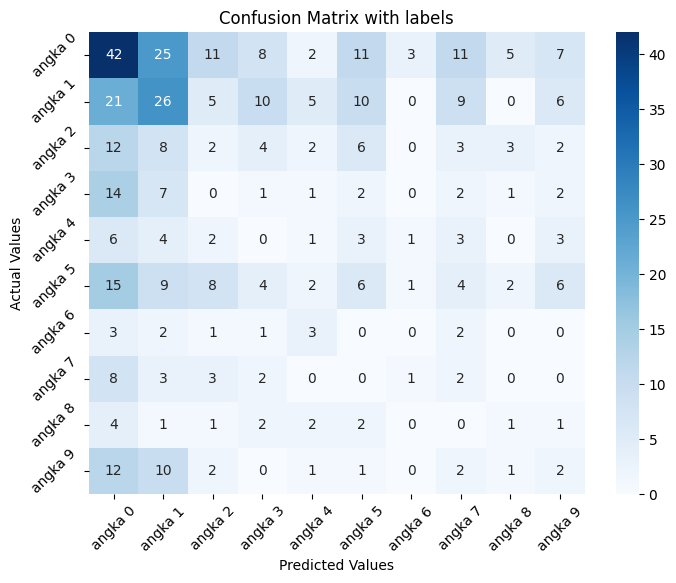

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# Fungsi untuk mendapatkan prediksi model dan label sebenarnya
def get_predictions_and_labels(model, data_generator):
    predictions = model.predict(data_generator)
    true_classes = data_generator.classes
    return predictions, true_classes

# Mendapatkan prediksi dan label sebenarnya untuk data uji
y_pred_prob, y_true = get_predictions_and_labels(model2c, test_generator)
y_pred = np.argmax(y_pred_prob, axis=1)

# Membuat matriks konfusi
cf_matrix = confusion_matrix(y_true, y_pred)

# Membuat visualisasi matriks konfusi
fig, ax = plt.subplots(figsize=(8, 6))
sns.heatmap(cf_matrix, annot=True, fmt='g', cmap='Blues', ax=ax)

# Menetapkan label dan judul
ax.set_title('Confusion Matrix with labels')
ax.set_xlabel('Predicted Values')
ax.set_ylabel('Actual Values')

class_labels = list(test_generator.class_indices.keys())

# Menetapkan label pada sumbu x dan y sesuai dengan jenis kelas
ax.xaxis.set_ticklabels(class_labels, rotation=45)
ax.yaxis.set_ticklabels(class_labels, rotation=45)

# Menampilkan visualisasi Matriks Konfusi
plt.show()

In [ ]:
from sklearn.metrics import accuracy_score

test_accuracy = accuracy_score(y_true, y_pred)
print(f"Test Accuracy: {test_accuracy}")

Test Accuracy: 0.18651685393258427
